In [1]:
# Import important libraries 
import tensorflow as tf
import pandas as pd
from IPython.display import YouTubeVideo

In [2]:
records_path = "./2/frame/train/train0111.tfrecord"

In [3]:
print(records_path)

./2/frame/train/train0111.tfrecord


In [4]:
vid_ids = [] # This array stores the video IDs extracted from the TFRecord file.
labels = []  # This array stores the label_ids associated with each video. The label ids are mapped to label names through vocabulary.csv
             # which is discussed later. 
rgb = []     # This array stores the RGB features extracted from the TFRecord file.
audio = []   # This array stores the audio features extracted from the TFRecord file. 

## Format of Frame-level features @Yt8m
```
Frame-level features are stored as tensorflow.SequenceExample protocol buffers. A tensorflow.SequenceExample proto is reproduced here in text format:
context: {
  feature: {
    key  : "id"
    value: {
      bytes_list: {
        value: (Video id)
      }
    }
  }
  feature: {
    key  : "labels"
      value: {
        int64_list: {
          value: [1, 522, 11, 172]  # label list
        }
      }
    }
}

feature_lists: {
  feature_list: {
    key  : "rgb"
    value: {
      feature: {
        bytes_list: {
          value: [1024 8bit quantized features]
        }
      }
      feature: {
        bytes_list: {
          value: [1024 8bit quantized features]
        }
      }
      ... # Repeated for every second, up to 300
  }
  feature_list: {
    key  : "audio"
    value: {
      feature: {
        bytes_list: {
          value: [128 8bit quantized features]
        }
      }
      feature: {
        bytes_list: {
          value: [128 8bit quantized features]
        }
      }
    }
    ... # Repeated for every second, up to 300
  }

}
```

In [5]:
# Funciton for decoding quantized features
def decode_quantized_features(features):
    return tf.io.decode_raw(features, tf.uint8)

# Iterate over each record in the TFRecord file specified by records_path
for record in tf.compat.v1.python_io.tf_record_iterator(records_path):
    # Parse the SequenceExample from the binary record data
    seq_example = tf.train.SequenceExample.FromString(record)

    # Extract the video_id and labels
    vid_ids.append(seq_example.context.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
    labels.append(seq_example.context.feature['labels'].int64_list.value)

    # lists to store frame-level features
    rgb_features = []
    audio_features = []
    
    # Iterate over each frame-level feature pair (RGB and audio) in the SequenceExample
    for rgb_feature, audio_feature in zip(seq_example.feature_lists.feature_list['rgb'].feature,
                                           seq_example.feature_lists.feature_list['audio'].feature):
        
        # Decode the quantized RGB features and audio features
        decoded_rgb = decode_quantized_features(rgb_feature.bytes_list.value[0])     
        decoded_audio = decode_quantized_features(audio_feature.bytes_list.value[0]) 

        rgb_features.append(decoded_rgb)
        audio_features.append(decoded_audio)
    
    # Append frame level list to main list 
    rgb.append(rgb_features)
    audio.append(audio_features)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [6]:
print('Number of videos in this tfrecord: ',len(vid_ids))
print ('Number of labels in this tfrecord: ', len (labels))
print('Picking a youtube video id:',vid_ids[15])

Number of videos in this tfrecord:  1029
Number of labels in this tfrecord:  1029
Picking a youtube video id: k6bX


In [7]:
print(vid_ids[:10])

['83bX', 'xCbX', 'gdbX', 'RMbX', 'v6bX', 'OnbX', 'd5bX', '0IbX', 'X8bX', 'SCbX']


In [8]:
print(labels[:10])

[[0, 79, 91], [5], [5, 16], [15, 18, 170, 314], [3, 6, 8, 414], [18, 43, 59, 101, 549, 693, 906], [1587], [3], [0, 1, 88, 242, 254, 313, 1331, 1364], [141, 396]]


In [9]:
print(len(rgb[0]))

300


In [10]:
print(rgb[0])

[<tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([149,  84, 131, ..., 142,  27,  86], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([141, 105, 125, ..., 130,  32,  56], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([160, 108, 131, ..., 147,  29,  93], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([189, 120, 103, ..., 205,   1, 255], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([165,  95, 126, ..., 169,   8, 166], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([162, 112,  88, ..., 176, 135, 119], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([159, 140,  76, ..., 148, 118, 149], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([211, 135,  85, ..., 202, 137,  93], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([223,  94, 115, ..., 228, 155, 252], dtype=uint8)>, <tf.Tensor: shape=(1024,), dtype=uint8, numpy=array([180, 103, 

In [11]:
print(rgb[0][10])

tf.Tensor([118 129  97 ... 255   0 160], shape=(1024,), dtype=uint8)


- Here, the youtube video id: 'k6bX' of the dataset maps to "cEoT60kT4dM".

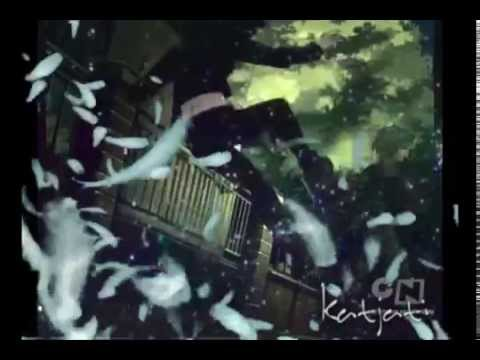

In [12]:
YouTubeVideo("cEoT60kT4dM")

### The label ids are mapped to label names through vocabulary.csv 

In [13]:
vocabulary = pd.read_csv("./2/frame/vocabulary.csv")

In [14]:
vocabulary.head()

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
0,0,788288,/m/03bt1gh,Game,https://en.wikipedia.org/wiki/Game,Games,NaN,NaN,"A game is structured form of play, usually und..."
1,1,539945,/m/01mw1,Video game,https://en.wikipedia.org/wiki/Video_game,Games,NaN,NaN,A video game is an electronic game that involv...
2,2,415890,/m/07yv9,Vehicle,https://en.wikipedia.org/wiki/Vehicle,Autos & Vehicles,NaN,NaN,A vehicle is a mobile machine that transports ...
3,3,378135,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
4,4,286532,/m/09jwl,Musician,https://en.wikipedia.org/wiki/Musician,Arts & Entertainment,NaN,NaN,A musician is a person who plays a musical ins...


In [16]:
vocabulary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             3862 non-null   int64 
 1   TrainVideoCount   3862 non-null   int64 
 2   KnowledgeGraphId  3862 non-null   object
 3   Name              3806 non-null   object
 4   WikiUrl           3806 non-null   object
 5   Vertical1         3862 non-null   object
 6   Vertical2         584 non-null    object
 7   Vertical3         32 non-null     object
 8   WikiDescription   3806 non-null   object
dtypes: int64(2), object(7)
memory usage: 271.7+ KB


In [17]:
vocabulary.describe()

,Index,TrainVideoCount
count,3862.000000,3862.000000
mean,1930.500000,3032.527188
std,1115.007698,21182.048375
min,0.000000,123.000000
25%,965.250000,234.000000
50%,1930.500000,440.500000
75%,2895.750000,1199.750000
max,3861.000000,788288.000000


In [18]:
print(vocabulary.iloc[316]) # Television Advertisement

Index                                                             315
TrainVideoCount                                                  4898
KnowledgeGraphId                                            /m/018ng8
Name                                         Television advertisement
WikiUrl             https://en.wikipedia.org/wiki/Television_adver...
Vertical1                                        Arts & Entertainment
Vertical2                                                         NaN
Vertical3                                                         NaN
WikiDescription     A television advertisement is a span of televi...
Name: 316, dtype: object
